## Linear Regression Bike Sharing Assignment

### Importing nessary libraries:

In [1]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

pd.set_option("display.max_columns", 122)
pd.set_option("display.max_rows", 1000)

import statsmodels
import statsmodels.api as sm
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Reading and Understanding the dataset

In [2]:
# Importing the dataset

Bike_sharing=pd.read_csv("day.csv")


In [3]:
Bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
Bike_sharing.shape

(730, 16)

In [5]:
Bike_sharing.size

11680

In [6]:
Bike_sharing.ndim

2

In [7]:
Bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
Bike_sharing.info()
# Here we can get the information of the data types of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#Stastical Information of the columns of the data set
Bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
Bike_sharing.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

### Cleaning the DataSet:

#### Droping the columns that are not usefull for analysis

-  From the Data dictionary we know that the "instant" is just a column identifier (index), hence we don't need this 
   column.
-  We already the column containing the information about month and year.Moreover for the model building we don't need to 
   consider the day to day trend, hence we can drop the "dteday" column. 
-  The "casual" and "registered"  columns describe the count of bike bike   by diffrent category. Here our target is to 
   find the total count of bike booked. In the data set we already have a column (i.e cnt = casual + registered) which gives the    total count of bike booked, hence we can drop this two column.
- We will remove atemp column as we already have a temp column and these both the variable are almost similar.

In [11]:
# Droping the columns:
drop_columns=["instant","dteday","casual","registered","atemp"]
Bike_sharing=Bike_sharing.drop(drop_columns,axis=1)

In [12]:
Bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [13]:
# Renaming the columns for better readbility
Bike_sharing=Bike_sharing.rename(columns={"yr":"Year","mnth":"Month","hum":"Humidity","weathersit":"Weather","cnt":"Total_count"})
# The "cnt" columns gives us the total count of bike booked (casual + registered), hence we changed the column name to "Total_count".

#### Handling the missing values:

In [14]:
Bike_sharing.isnull().sum()

season         0
Year           0
Month          0
holiday        0
weekday        0
workingday     0
Weather        0
temp           0
Humidity       0
windspeed      0
Total_count    0
dtype: int64

- The dataset does not have any null values.

#### Handling Duplicates

In [15]:
Bike_sharing.duplicated().sum()

0

- The dataset does not have any duplicate values.

#### Handling Outliers

In [16]:
Bike_sharing.nunique()

season           4
Year             2
Month           12
holiday          2
weekday          7
workingday       2
Weather          3
temp           498
Humidity       594
windspeed      649
Total_count    695
dtype: int64

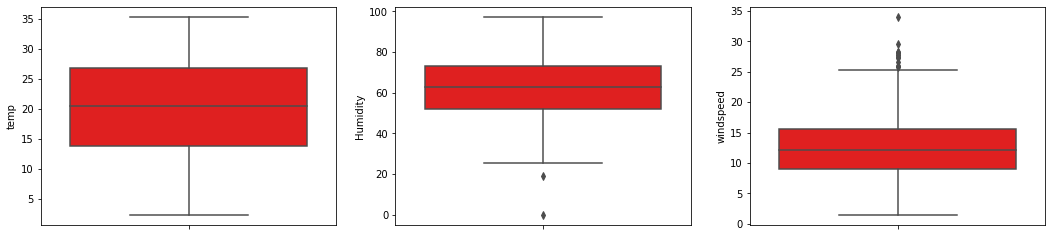

In [17]:
num_cols = ['temp', 'Humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in num_cols:
    plt.subplot(1,3,i)
    sns.boxplot(y=col, data=Bike_sharing, color="r")
    i=i+1

- As per the plots, we can see that there are no such outlier that are need to be handled.

In [18]:
Bike_sharing.dtypes

season           int64
Year             int64
Month            int64
holiday          int64
weekday          int64
workingday       int64
Weather          int64
temp           float64
Humidity       float64
windspeed      float64
Total_count      int64
dtype: object

- We can see that there are some cataegorical column such as season, Weather etc have numerical value . We need to change the 
  values to categorical form with help of data dictionary provided.

In [19]:
Bike_sharing.head()

,season,Year,Month,holiday,weekday,workingday,Weather,temp,Humidity,windspeed,Total_count
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [20]:
# Season column 
# 1=spring, 2=summer, 3=fall, 4=winter

Bike_sharing["season"]=Bike_sharing["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [21]:
Bike_sharing.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [22]:
Bike_sharing.Month.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: Month, dtype: int64

In [23]:
# Month column 
# Here the number 1 to 12 reprents the Month of the Year
Bike_sharing["Month"]=Bike_sharing["Month"].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [24]:
Bike_sharing.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [25]:
# Weekdays column
# 0 to 6 represrnts the 7 days of week
Bike_sharing["weekday"]=Bike_sharing["weekday"].map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})

In [26]:
# Weather column
# As per data dictionary the Weather column is divided into 4 weather categories says 1,2,3,4 
# Here we can divide the Weather in categories says A,B,C,D as follows:
# 1:A (Clear, Few clouds, Partly cloudy, Partly cloudy) 
# 2:B (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
# 3:C (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
# 4:D (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

Bike_sharing["Weather"]=Bike_sharing["Weather"].map({1:"A",2:"B",3:"C"})


In [27]:
Bike_sharing.Weather.value_counts()

A    463
B    246
C     21
Name: Weather, dtype: int64

### EDA

### Analyzing the relationship between target variable and categorical variables

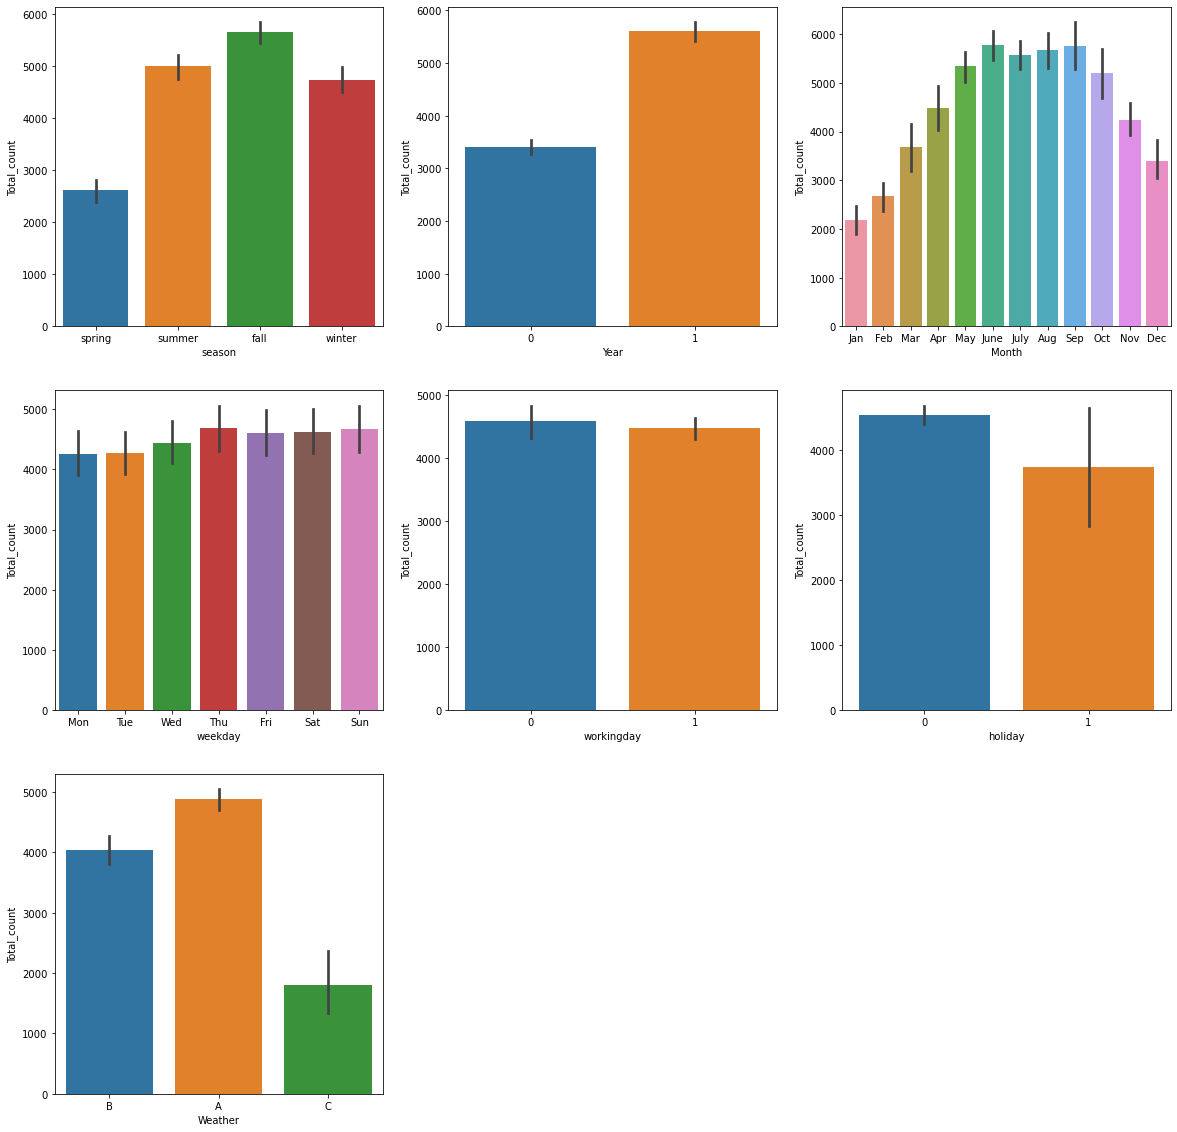

In [28]:
# Box-plots:
cat_vars=["season","Year","Month","weekday","workingday","holiday","Weather"]
plt.figure(figsize=(20,20))
for i in enumerate(cat_vars):
     
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=Bike_sharing, y="Total_count", x=i[1])
plt.show()

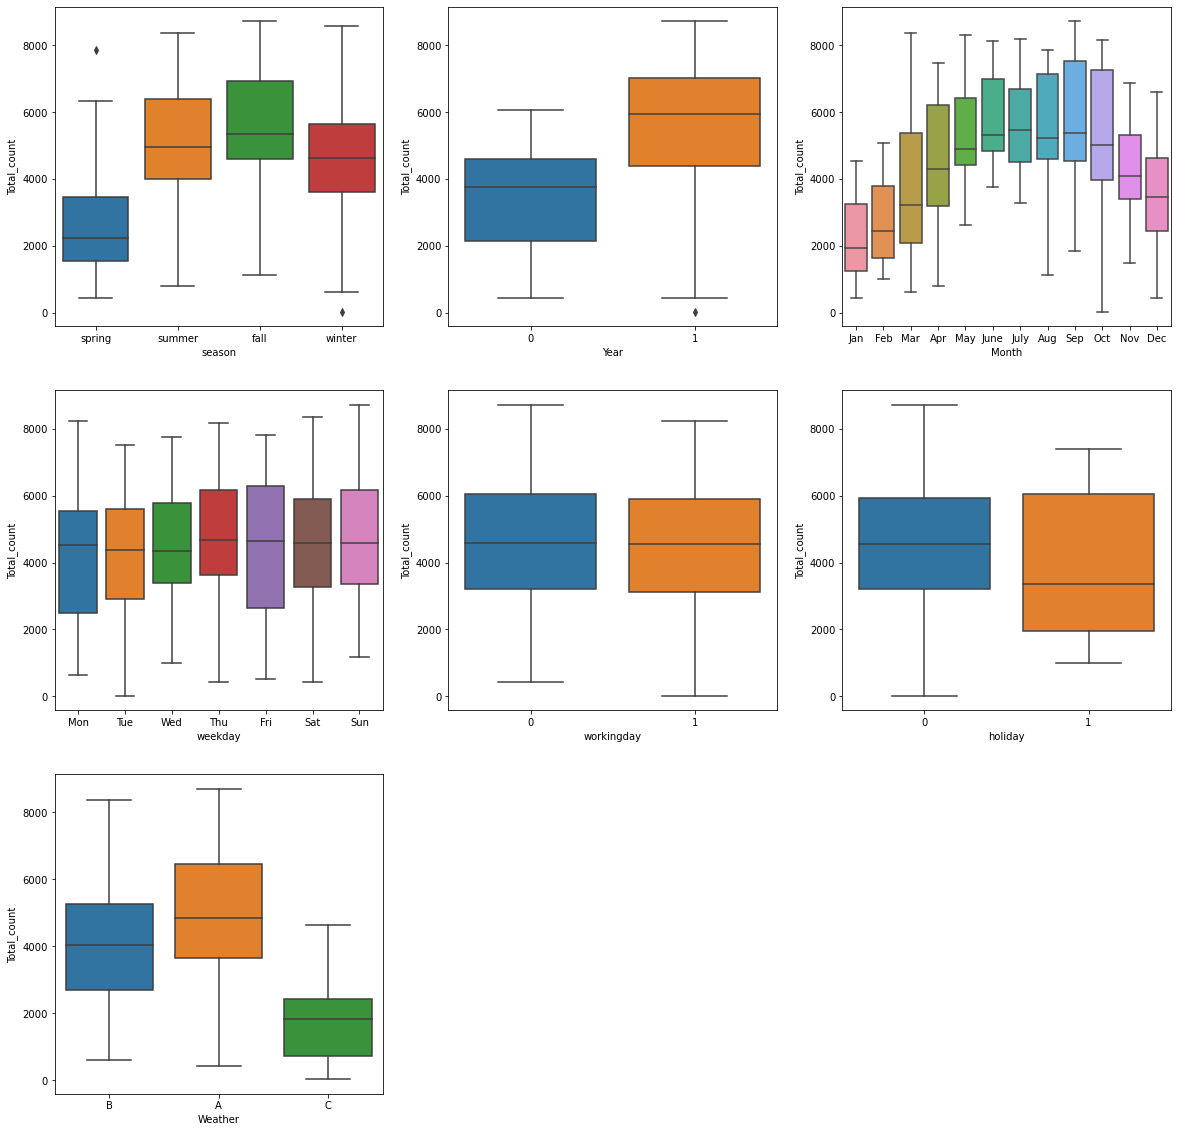

In [29]:
cat_vars=["season","Year","Month","weekday","workingday","holiday","Weather"]
plt.figure(figsize=(20,20))
for i in enumerate(cat_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=Bike_sharing, y="Total_count", x=i[1])
plt.show()

- Insights:
    - During Fall Season the demand increases and there is significant decrease in winter season.
    - There was a significant increase in demand of rental bike in year 2019 (i.e 1, Here in year column 0 represents 2018 and    1 represents 2019).
    - The demand increases continuously with each month till June .  
    - June and September month has highest demand. After September there is a continuous decrease in demands . Also we can see         that the demad decreases in end and beging of the year.   
    - If there is a holiday demand decreases .
    - Working day does not show any significant change. Demand for rental bike is same in weekdays and weekends.
    - Demand increases if the Weather is pretty Clear (i.e A).

### Analyzing the relationship between Numerical variable :

<Figure size 1080x1080 with 0 Axes>

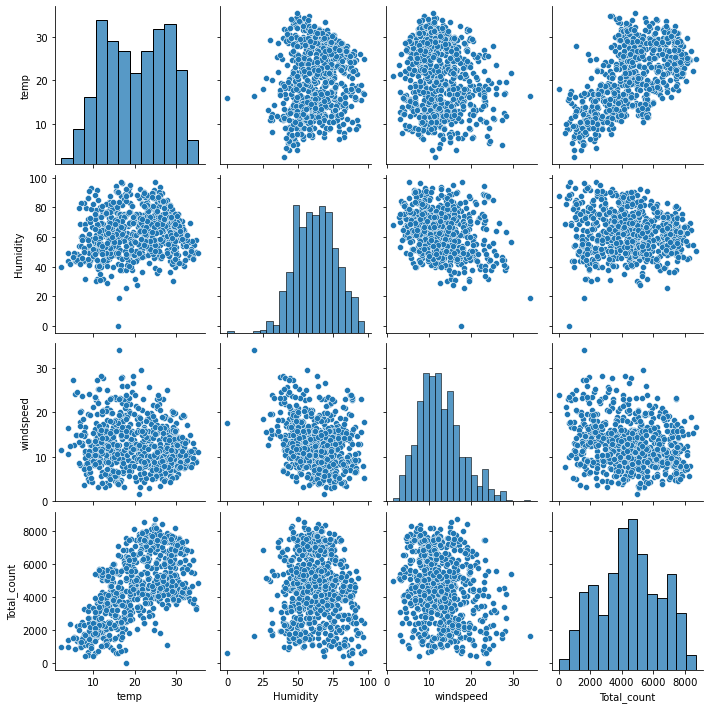

In [30]:
#Pairplot for numerical variable
plt.figure(figsize=(15,15))
sns.pairplot(data=Bike_sharing, vars=["temp","Humidity","windspeed","Total_count"])

plt.show()

- Insights
    - The variables temp  shows as high positive corealtion with Total_count (target variable).    
    - We can get a more clear picture using heatmap.

In [31]:
Bike_sharing.corr()

,Year,holiday,workingday,temp,Humidity,windspeed,Total_count
Year,1.000000,0.008195,-0.011852,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.128565,-0.158186,0.627044
Humidity,-0.112547,-0.015662,0.053770,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.248506,1.000000,-0.235132
Total_count,0.569728,-0.068764,-0.027640,0.627044,-0.098543,-0.235132,1.000000


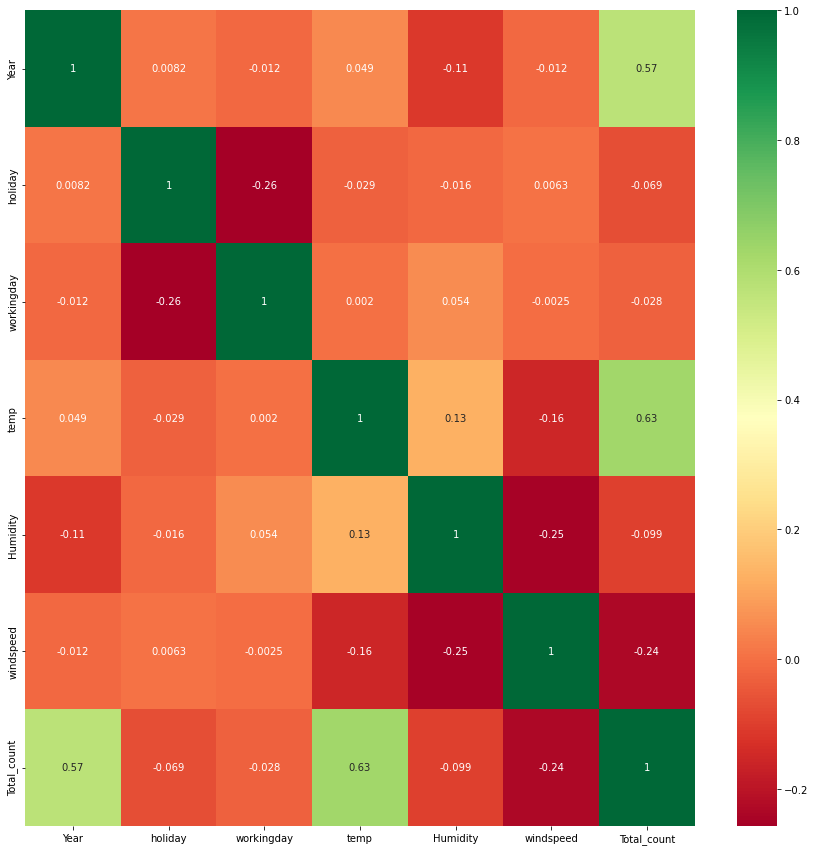

In [32]:
# Heatmap:
plt.figure(figsize=(15,15))
sns.heatmap(Bike_sharing.corr(),annot=True,cmap="RdYlGn")
plt.show()

- Insights
    - temp  are highly correlated with Total_count(0.63)
    - windspeed is negatively correlared with temp, Humidity and Total_count
    - Total count is negatively correlated with Humidity (i.e -0.99) and windspeed (i.e. -0.24)

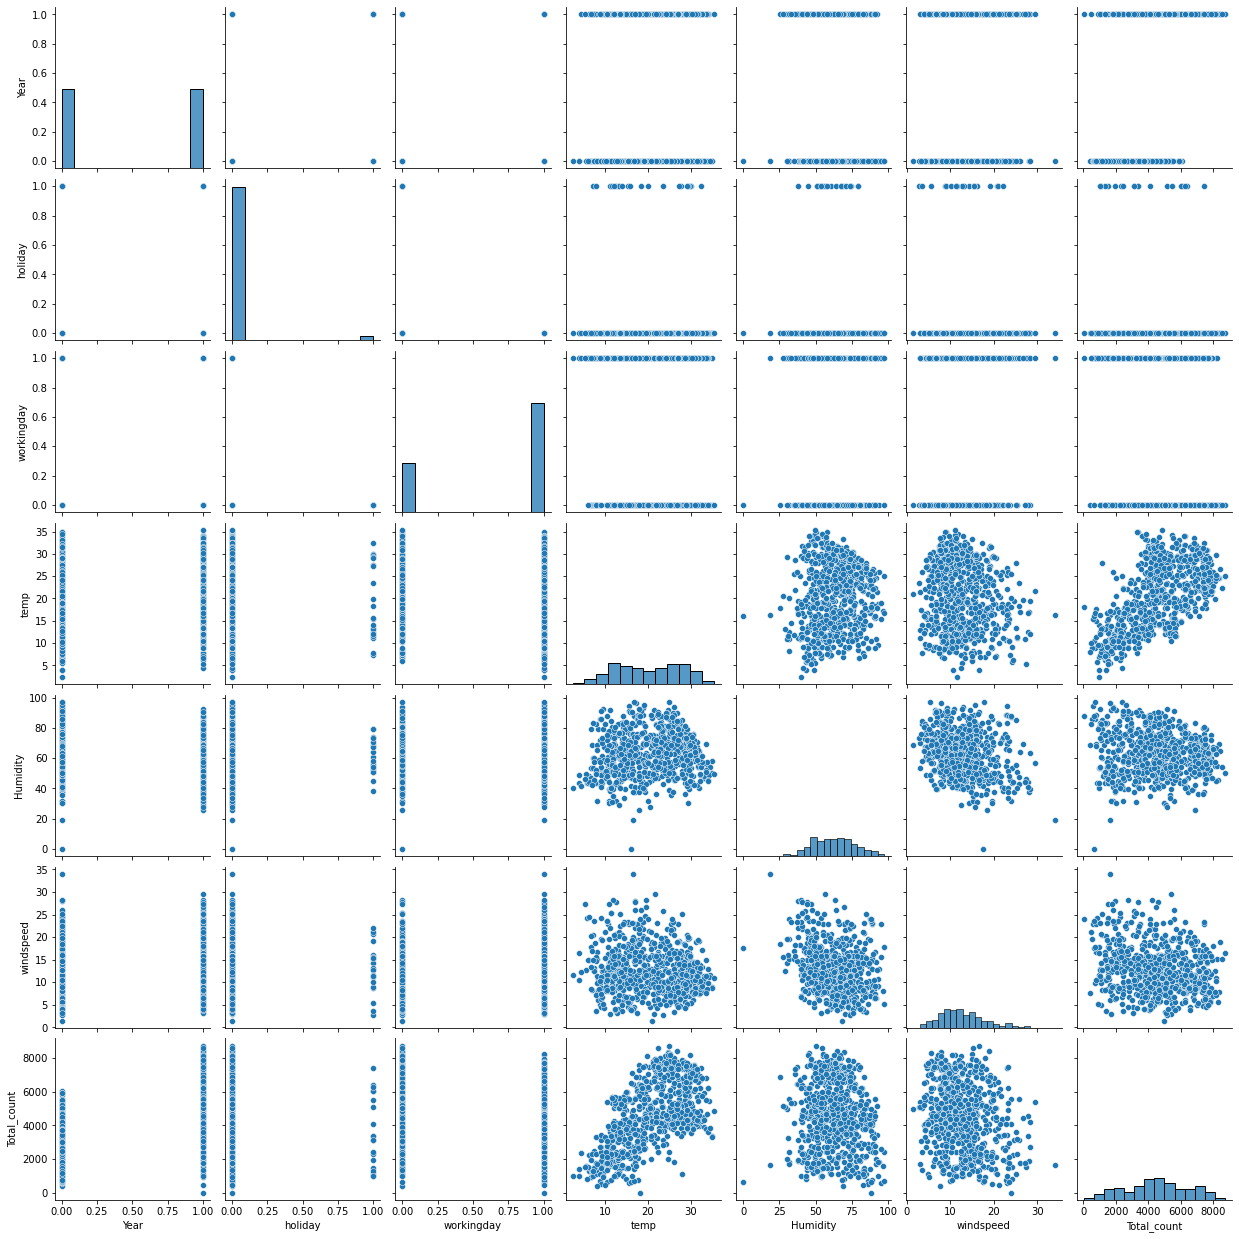

In [33]:
# pair polt for numerial variables: 
sns.pairplot(Bike_sharing)

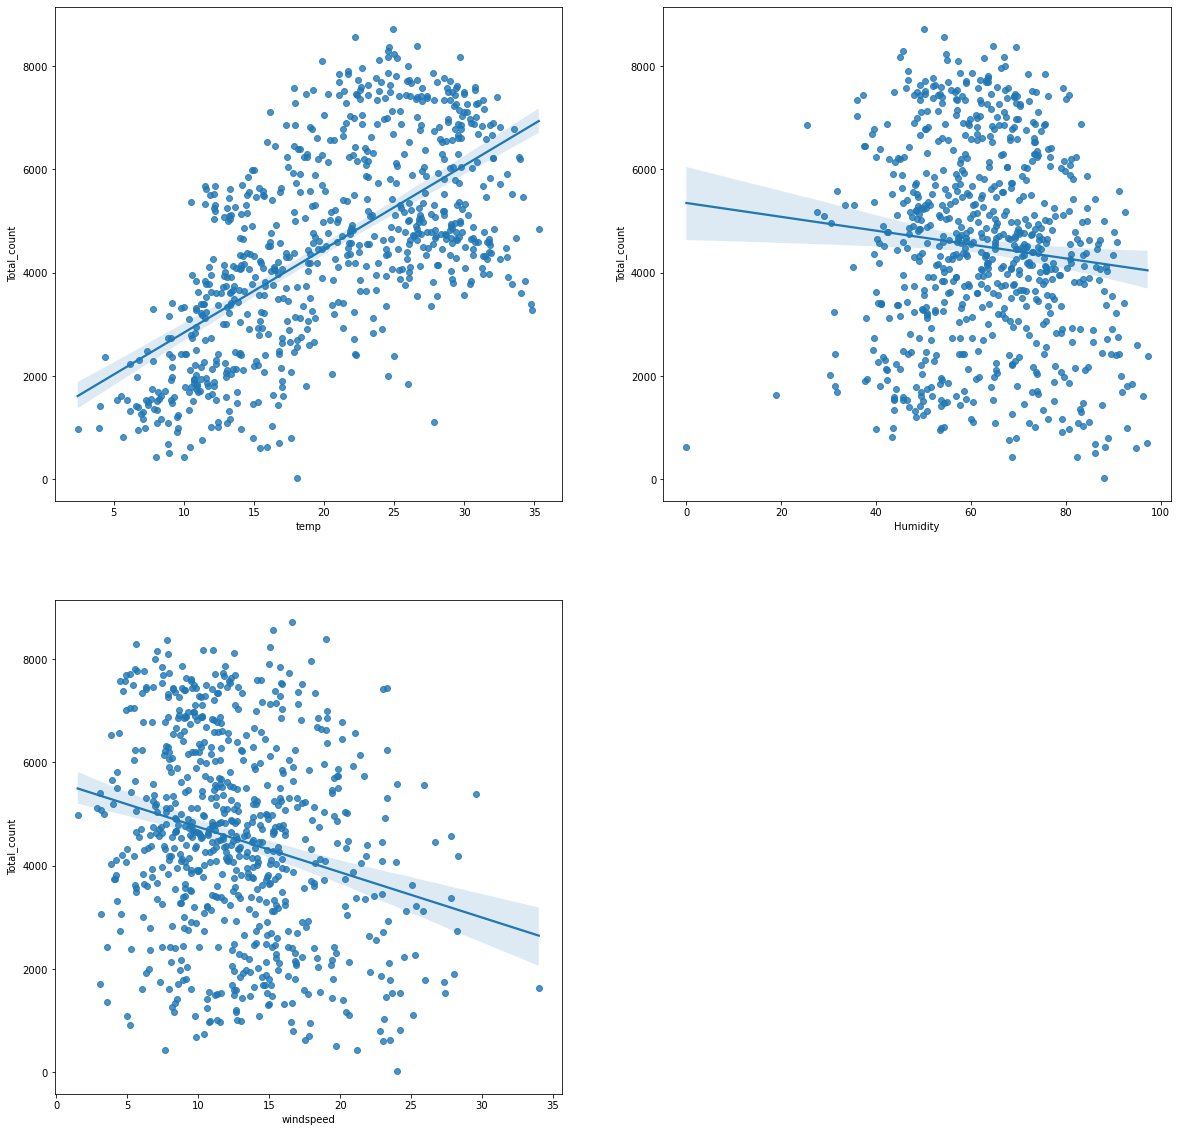

In [34]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.regplot(data=Bike_sharing,x="temp",y="Total_count")
plt.subplot(2,2,2)
sns.regplot(data=Bike_sharing,x="Humidity",y="Total_count")
plt.subplot(2,2,3)
sns.regplot(data=Bike_sharing,x="windspeed",y="Total_count")
plt.show()

- Insights:    
    - The above graph shows that Total_count is linearly increasing with temp .
    - Also we can see that Total_count is linearly decresing with Humidity and windspeed.


### Data Preparation for Linear Regression

#### Creating Dummy Varibles

In [35]:
Bike_sharing.head()

,season,Year,Month,holiday,weekday,workingday,Weather,temp,Humidity,windspeed,Total_count
0,spring,0,Jan,0,Mon,1,B,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,B,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,A,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,A,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,A,9.305237,43.6957,12.522300,1600


In [36]:
cat_var=['season', 'Month', 'weekday', 'Weather']
# categorical Columns 
# For this categorical column we need to create the dummy variables

In [37]:
# Dummy Variable
Bike_Share_new=pd.get_dummies(data=Bike_sharing,columns=cat_var,drop_first=True)

In [38]:
Bike_Share_new.head()

,Year,holiday,workingday,temp,Humidity,windspeed,Total_count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Weather_B,Weather_C
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
Bike_Share_new.describe()

,Year,holiday,workingday,temp,Humidity,windspeed,Total_count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Weather_B,Weather_C
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.336986,0.028767
std,0.500343,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
Bike_Share_new.shape

(730, 29)

In [41]:
Bike_Share_new.corr()

,Year,holiday,workingday,temp,Humidity,windspeed,Total_count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Weather_B,Weather_C
Year,1.000000e+00,0.008195,-0.011852,0.048789,-0.112547,-0.011624,0.569728,3.225068e-16,-1.751358e-17,-1.096204e-16,4.139281e-17,3.709668e-17,-2.801585e-16,5.516768e-17,1.465455e-16,-2.089634e-16,1.599112e-16,7.671648e-17,-2.983215e-17,8.571788e-17,-2.138778e-17,-0.003904,-6.776953e-17,-1.310791e-16,-1.642568e-17,0.003904,-2.848931e-16,-0.005796,-0.073758
holiday,8.195345e-03,1.000000,-0.257009,-0.028764,-0.015662,0.006257,-0.068764,3.464187e-02,-2.440810e-02,1.678505e-02,-5.243172e-02,6.362682e-03,1.198013e-02,3.575989e-02,6.362682e-03,-5.150208e-02,-5.243172e-02,6.362682e-03,6.785194e-02,6.362682e-03,8.174933e-03,-0.070541,-4.670117e-02,-2.325423e-02,-4.670117e-02,0.046228,1.877683e-01,-0.018668,-0.029619
workingday,-1.185197e-02,-0.257009,1.000000,0.002044,0.053770,-0.002453,-0.027640,-2.250665e-02,1.340523e-02,1.453809e-02,2.332432e-02,-1.918942e-02,-7.381624e-03,2.067449e-03,2.067449e-03,-4.581199e-03,2.067449e-03,1.269588e-02,-4.581199e-03,1.269588e-02,-2.615717e-02,0.274469,-6.086821e-01,-6.086821e-01,2.644637e-01,0.232252,1.796922e-01,-0.061689,0.044340
temp,4.878919e-02,-0.028764,0.002044,1.000000,0.128565,-0.158186,0.627044,-6.194080e-01,1.548756e-01,-2.255900e-01,3.546479e-01,-2.856645e-01,-3.106261e-01,-4.315050e-01,4.327222e-01,3.083139e-01,-1.749229e-01,1.651884e-01,-2.066901e-01,-1.761584e-02,1.977294e-01,-0.036300,1.589260e-02,-1.217888e-02,2.298426e-02,-0.022016,4.621417e-03,-0.096297,-0.058461
Humidity,-1.125471e-01,-0.015662,0.053770,0.128565,1.000000,-0.248506,-0.098543,-1.848840e-01,-2.870035e-03,1.639076e-01,2.158033e-02,8.220022e-02,-1.305206e-01,-8.955482e-02,-6.375685e-02,-1.090477e-01,-8.388743e-02,1.312731e-01,-5.837193e-03,1.415566e-01,1.831181e-01,-0.006715,-3.441916e-02,-3.517182e-02,2.537781e-03,0.025340,1.966562e-02,0.490628,0.267592
windspeed,-1.162435e-02,0.006257,-0.002453,-0.158186,-0.248506,1.000000,-0.235132,1.788801e-01,9.742067e-02,-1.356120e-01,-6.912465e-02,-5.461552e-02,9.609291e-02,6.211669e-02,-9.608996e-02,-1.962363e-02,1.265752e-01,-2.953449e-02,-2.587339e-02,-6.013274e-02,-9.482530e-02,0.021537,2.391406e-03,4.782253e-03,-3.228996e-02,0.012442,-7.328425e-03,-0.037177,0.117332
Total_count,5.697285e-01,-0.068764,-0.027640,0.627044,-0.098543,-0.235132,1.000000,-5.617018e-01,1.453245e-01,6.461909e-02,1.821001e-01,-1.738782e-01,-2.738478e-01,-3.671673e-01,1.662362e-01,1.955684e-01,-1.284558e-01,1.325529e-01,-4.034360e-02,1.088461e-01,1.946635e-01,-0.052581,2.500442e-02,3.322694e-02,3.867215e-02,-0.049471,-1.328226e-02,-0.170686,-0.240602
season_spring,3.225068e-16,0.034642,-0.022507,-0.619408,-0.184884,0.178880,-0.561702,1.000000e+00,-3.320989e-01,-3.248593e-01,-1.742860e-01,7.652343e-02,5.038592e-01,5.325406e-01,-1.742860e-01,-1.711958e-01,2.817311e-01,-1.742860e-01,-1.711958e-01,-1.742860e-01,-1.711958e-01,0.010049,3.238560e-03,3.238560e-03,-1.494720e-02,0.010049,-5.854320e-03,0.029198,-0.022400
season_summer,-1.751358e-17,-0.024408,0.013405,0.154876,-0.002870,0.097421,0.145325,-3.320989e-01,1.000000e+00,-3.296500e-01,-1.768562e-01,-1.768562e-01,-1.673311e-01,-1.768562e-01,-1.768562e-01,2.857575e-01,7.211912e-02,5.248014e-01,-1.737204e-01,-1.768562e-01,-1.737204e-01,-0.004187,-1.928926e-03,-1.928926e-03,7.097458e-03,-0.004187,7.097458e-03,0.040011,-0.043283
season_winter,-1.096204e-16,0.016785,0.014538,-0.225590,0.163908,-0.135612,0.064619,-3.248593e-01,-3.296500e-01,1.000000e+00,-1.730008e-01,2.847396e-01,-1.636834e-01,-1.730008e-01,-1.730008e-01,-1.699334e-01,-1.730008e-01,-1.730008e-01,5.269844e-01,5.364968e-01,1.591136e-02,0.003611,-1.240304e-02,-3.275804e-03,5.851436e-03,0.003611,5.851436e-03,0.033857,0.093128


### Spliting the Dataset into Train and Test Dataset

In [42]:
# Dividing the dataset into train and test data
Bike_train,Bike_test=train_test_split(Bike_Share_new, train_size=0.7, random_state=100)

In [43]:
print(Bike_train.shape)
print(Bike_test.shape)

(510, 29)
(220, 29)


In [44]:
Bike_test.head()

,Year,holiday,workingday,temp,Humidity,windspeed,Total_count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Weather_B,Weather_C
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
Bike_train.head()

,Year,holiday,workingday,temp,Humidity,windspeed,Total_count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Weather_B,Weather_C
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0,0,0,13.803347,72.9583,14.707907,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [46]:
# Craeting X and Y for train dataset:
y_train=Bike_train.pop("Total_count")
X_train=Bike_train

In [47]:
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


In [48]:
X_train.head()

,Year,holiday,workingday,temp,Humidity,windspeed,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Weather_B,Weather_C
576,1,0,1,29.246653,70.4167,11.083475,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0,0,0,13.803347,72.9583,14.707907,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Rescaling of continuous variable

In [49]:
# We will use MinMax Scaling Method:
cont_var=["temp","Humidity","windspeed"]
scaler_obj=MinMaxScaler()
X_train[cont_var]=scaler_obj.fit_transform(X_train[cont_var])

In [50]:
X_train.describe()

,Year,holiday,workingday,temp,Humidity,windspeed,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Weather_B,Weather_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
X_train.head()

,Year,holiday,workingday,temp,Humidity,windspeed,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Weather_B,Weather_C
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## Model Buliding:

### Model 1: Bulding the model by Automated approch using RFE:

In [52]:
# Buliding a linear model using sklearn :
lin_mod_1=LinearRegression()
lin_mod_1.fit(X_train,y_train)

# using RFE select max 15 feature for model building: 

Rfe=RFE(lin_mod_1,15)
Rfe.fit(X_train,y_train)

#Column selected by Rfe and there ranking:
list(zip(X_train.columns,Rfe.support_, Rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('Month_Aug', False, 9),
 ('Month_Dec', True, 1),
 ('Month_Feb', False, 2),
 ('Month_Jan', True, 1),
 ('Month_July', True, 1),
 ('Month_June', False, 11),
 ('Month_Mar', False, 14),
 ('Month_May', False, 8),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 12),
 ('Month_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 10),
 ('Weather_B', True, 1),
 ('Weather_C', True, 1)]

In [53]:
# Column selected by RFE
X_rfe_s=X_train.columns[Rfe.support_]
X_rfe_s
# we will first use this column for manual model building process.

Index(['Year', 'holiday', 'temp', 'Humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'Month_Dec', 'Month_Jan',
       'Month_July', 'Month_Nov', 'Month_Sep', 'Weather_B', 'Weather_C'],
      dtype='object')

In [54]:
# Columns rejected by RFE
X_rfe_r=X_train.columns[~Rfe.support_]
X_rfe_r

Index(['workingday', 'Month_Aug', 'Month_Feb', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Bulding Model by Manual Approch

In [55]:
# Creating a function to build a model using statsmodels library 
def stats_model(col):
    X_train_sm=sm.add_constant(X_train[col])
    lr_model=sm.OLS(y_train,X_train_sm).fit()
    print(lr_model.summary())
    return lr_model

In [56]:
# Creating a function for VIF as we need this after every model:
def vif(col):
    df_col=X_train[col]
    vif=pd.DataFrame()
    vif["Features"]=df_col.columns
    vif["VIF"]=[variance_inflation_factor(df_col.values,i) for i in range(df_col.shape[1])]
    vif["VIF"] = round(vif["VIF"],3)
    vif=vif.sort_values(by="VIF", ascending=False)
    return vif
    

### Model 2:

In [57]:
# Bulid the model using RFE selcted columns:
cols_1=['Year', 'holiday', 'temp', 'Humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'Month_Dec', 'Month_Jan',
       'Month_July', 'Month_Nov', 'Month_Sep', 'Weather_B', 'Weather_C']
stats_model(cols_1)
vif(cols_1)

                            OLS Regression Results                            
Dep. Variable:            Total_count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          8.15e-189
Time:                        12:33:15   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2800.5481    313.638      8.929

,Features,VIF
3,Humidity,30.889
2,temp,17.794
4,windspeed,4.723
5,season_spring,4.368
7,season_winter,4.063
6,season_summer,2.817
13,Weather_B,2.321
0,Year,2.089
11,Month_Nov,1.845
9,Month_Jan,1.746


- Insights:
     - As shown in summary every coefficient have p-value < 0.05
     - But VIF of Humidity is 30.88 which is not acceptable.  

### Model_3:

In [58]:
cols_3=['Year', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'Month_Dec', 'Month_Jan',
       'Month_July', 'Month_Nov', 'Month_Sep', 'Weather_B', 'Weather_C']

stats_model(cols_3)
vif(cols_3)

                            OLS Regression Results                            
Dep. Variable:            Total_count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          4.75e-186
Time:                        12:33:15   Log-Likelihood:                -4120.9
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     495   BIC:                             8335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2151.7943    279.592      7.696

,Features,VIF
2,temp,5.169
3,windspeed,4.669
6,season_winter,2.948
4,season_spring,2.888
5,season_summer,2.241
0,Year,2.074
10,Month_Nov,1.812
8,Month_Jan,1.656
9,Month_July,1.594
12,Weather_B,1.566


- As we know that temp and windspeed are negatively correlated with each other.
- In next model we try to remove one of this variable.

### Model_4:

In [59]:
# Removing windspeed
cols_4=['Year', 'holiday', 'temp',  'season_spring',
       'season_summer', 'season_winter', 'Month_Dec', 'Month_Jan',
       'Month_July', 'Month_Nov', 'Month_Sep', 'Weather_B', 'Weather_C']
stats_model(cols_4)
vif(cols_4)

                            OLS Regression Results                            
Dep. Variable:            Total_count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          5.35e-179
Time:                        12:33:15   Log-Likelihood:                -4140.5
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     496   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1618.9169    276.505      5.855

,Features,VIF
2,temp,4.303
5,season_winter,2.806
3,season_spring,2.120
0,Year,2.071
4,season_summer,1.943
9,Month_Nov,1.794
7,Month_Jan,1.651
8,Month_July,1.592
11,Weather_B,1.565
6,Month_Dec,1.466


 - The variables season_summer , Month_Jan, Month_Dec have p- value > 0.05, Therefor we will drop this variable in next module

### Model_5:

In [60]:
cols_5=['Year', 'holiday', 'temp',  'season_spring',
        'season_winter',  'Month_July', 'Month_Nov', 'Month_Sep', 'Weather_B', 'Weather_C']
stats_model(cols_5)
vif(cols_5)

                            OLS Regression Results                            
Dep. Variable:            Total_count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.18e-180
Time:                        12:33:15   Log-Likelihood:                -4145.5
No. Observations:                 510   AIC:                             8313.
Df Residuals:                     499   BIC:                             8360.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1760.4270    194.045      9.072

,Features,VIF
2,temp,2.989
0,Year,2.047
4,season_winter,1.888
6,Month_Nov,1.577
8,Weather_B,1.510
5,Month_July,1.334
3,season_spring,1.246
7,Month_Sep,1.196
9,Weather_C,1.065
1,holiday,1.059


- The variable Month_Nov has p-value > 0.05.

## Model_6

In [61]:
cols_6=['Year', 'holiday', 'temp',  'season_spring',
        'season_winter', 'Month_July' ,'Month_Sep', 'Weather_B', 'Weather_C']
stats_model(cols_6)
vif(cols_6)

                            OLS Regression Results                            
Dep. Variable:            Total_count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          5.25e-181
Time:                        12:33:15   Log-Likelihood:                -4146.9
No. Observations:                 510   AIC:                             8314.
Df Residuals:                     500   BIC:                             8356.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1718.4337    192.741      8.916

,Features,VIF
2,temp,2.988
0,Year,2.046
7,Weather_B,1.510
5,Month_July,1.334
4,season_winter,1.329
3,season_spring,1.246
6,Month_Sep,1.186
8,Weather_C,1.064
1,holiday,1.042


- Each and every coefficient of the model have p-value < 0.05, Hence they are significant.
- The VIF's of each coefficient less than 5 .
- The R-sq. (0.822) and Adj. R-sq. (0.819) are almost equal.
- Hence we can consider this model as our final model.


###  Final Model:

In [62]:
cols_6=['Year', 'holiday', 'temp',  'season_spring',
        'season_winter',  'Month_July', 'Month_Sep', 'Weather_B', 'Weather_C']
fin_lr=LinearRegression()
fin_lr.fit(X_train[cols_6],y_train)
print(fin_lr.coef_)
print(fin_lr.intercept_)

[ 2026.80216399  -874.16713875  4080.86029679  -974.9370778
   464.35345135  -599.619326     568.42599502  -679.05015466
 -2601.37125569]
1718.4336795342851


In [63]:
list(zip(X_train[cols_6].columns,Rfe.support_, Rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('temp', False, 3),
 ('season_spring', True, 1),
 ('season_winter', True, 1),
 ('Month_July', True, 1),
 ('Month_Sep', True, 1),
 ('Weather_B', True, 1),
 ('Weather_C', True, 1)]


## Model Evalution

### Residual Analysis (Error Terms):

In [64]:
# Prediction on Train dataset:
# Predicting the value of 
y_train_pred=fin_lr.predict(X_train[cols_6])

In [65]:
# Residual = Actual value - Predicted Value 
res=y_train-y_train_pred
res.head()

576     743.794494
426     169.407228
728   -1974.522096
482    -460.844140
111    -767.643886
Name: Total_count, dtype: float64

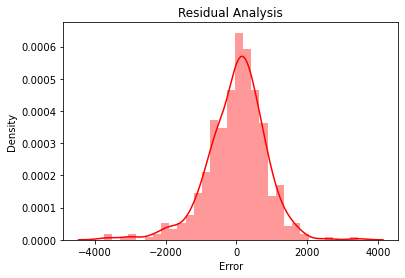

In [66]:
# Plot the Histogram of res
sns.distplot(res,color="red")
plt.title("Residual Analysis")
plt.xlabel("Error")
plt.show()

- The Error Terms (Residuals) are normal distributed arroud center. Here mean is nearly zero.

### Homoscedasticity

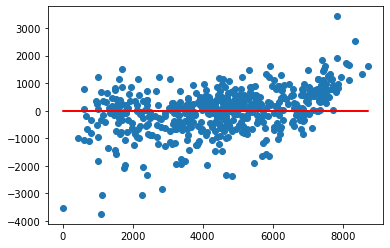

In [67]:

plt.scatter(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.show()

- There is no visible pattern for residual.

### Multi Colinearity

In [68]:
# VIF
vif(cols_6)

,Features,VIF
2,temp,2.988
0,Year,2.046
7,Weather_B,1.510
5,Month_July,1.334
4,season_winter,1.329
3,season_spring,1.246
6,Month_Sep,1.186
8,Weather_C,1.064
1,holiday,1.042


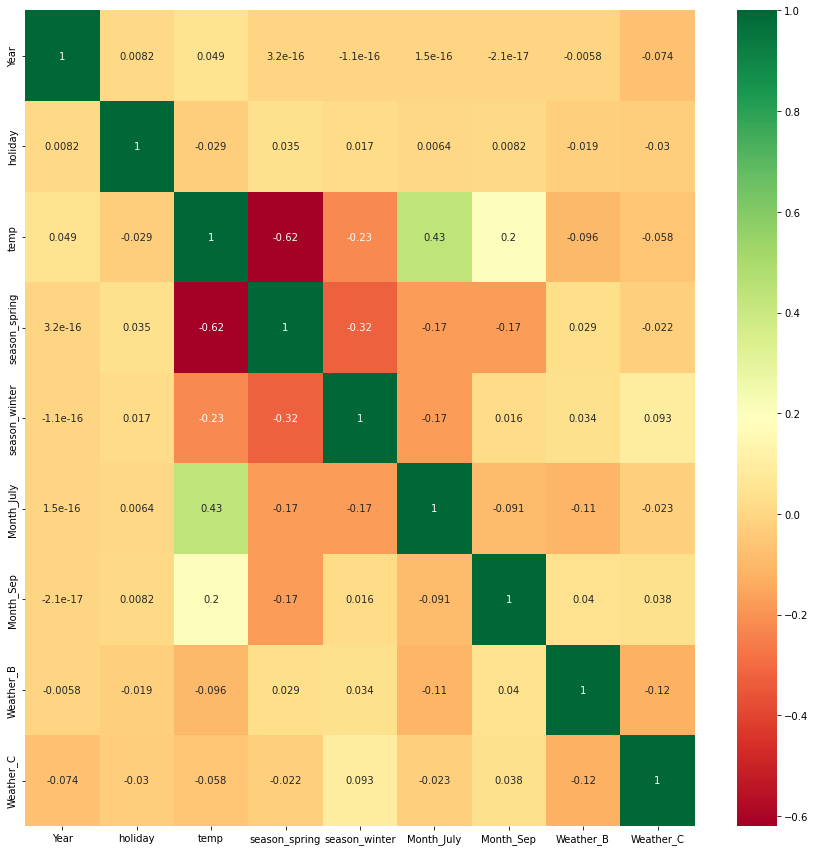

In [69]:
plt.figure(figsize=(15,15))
sns.heatmap(Bike_Share_new[cols_6].corr(),annot=True,cmap="RdYlGn")
plt.show()

- The vif of the features are less than 5. 
- Also by looking at heatmap there no multicollinearity between the features.

### Actual Value V/s Predicted Value

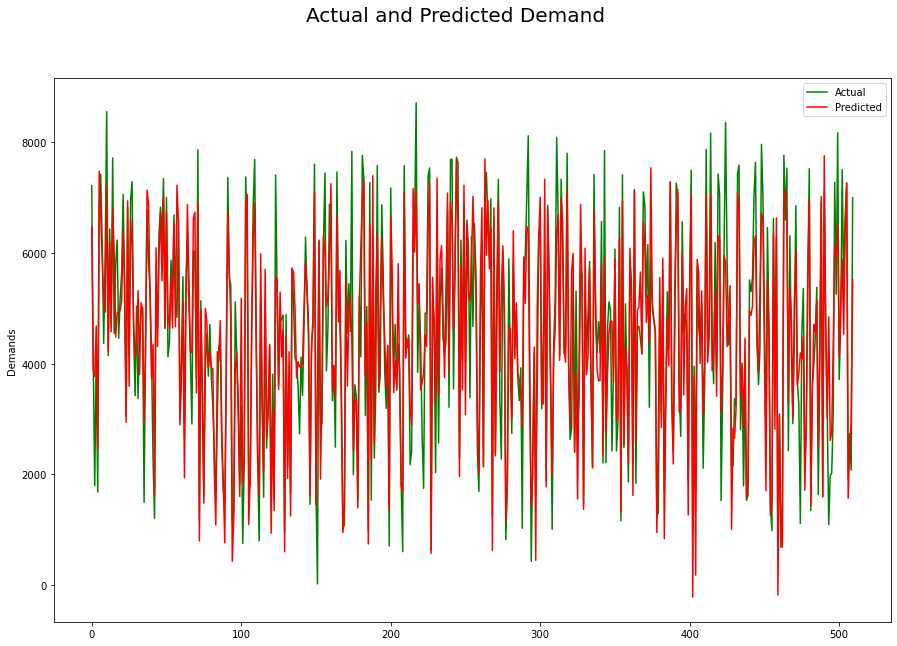

In [70]:
plt.figure(figsize=(15,10))
ticks = [i for i in range(0,len(X_train),1)]
plt.plot(ticks,y_train,color="green")
plt.plot(ticks,y_train_pred,color="red")
plt.suptitle('Actual and Predicted Demand ', fontsize = 20)
plt.legend(["Actual", "Predicted"])
plt.ylabel('Demands')
plt.show()

- Here we can see that the Actual value and Predected value overlap with each other and almost have same pattern.
- We can say that our model is performing good on train dataset.

In [71]:
# R2 Score:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8218825344337095

### Predcition on Test Dataset :

In [72]:
Bike_test.head()

,Year,holiday,workingday,temp,Humidity,windspeed,Total_count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Weather_B,Weather_C
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [73]:
#Dividing the test dataset into X and y
y_test=Bike_test.pop("Total_count")
X_test=Bike_test

In [74]:
X_test.shape

(220, 28)

In [75]:
# Rescaling the columns of X_test
cont_var=["temp","Humidity","windspeed"]

X_test[cont_var]=scaler_obj.transform(X_test[cont_var])

In [76]:
X_test.head()

,Year,holiday,workingday,temp,Humidity,windspeed,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Weather_B,Weather_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [77]:
X_test.describe()

,Year,holiday,workingday,temp,Humidity,windspeed,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Weather_B,Weather_C
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
# Predicting y for test set
y_test_pred=fin_lr.predict(X_test[cols_6])

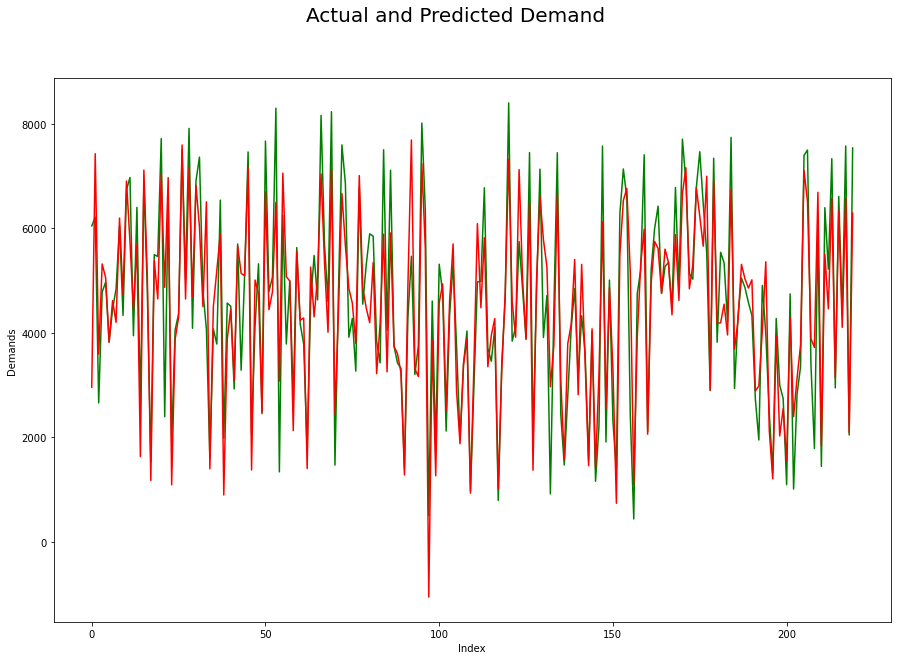

In [79]:
### actual v/s predicted  for test dataset
plt.figure(figsize=(15,10))
ticks = [i for i in range(0,len(X_test),1)]
plt.plot(ticks,y_test,color="green")
plt.plot(ticks,y_test_pred,color="red")
plt.suptitle('Actual and Predicted Demand ', fontsize = 20)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

<Figure size 432x288 with 0 Axes>

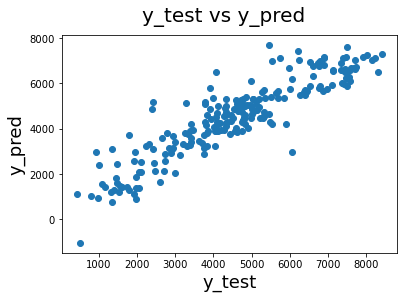

In [80]:
plt.figure()
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)
plt.show()

In [81]:
# R-square:
# For Test:
print(f"The R-sq for Test dataset is : {r2_score(y_true=y_test,y_pred=y_test_pred)}")
# For Train
print(f"The R-sq for Train dataset is : {r2_score(y_true=y_train,y_pred=y_train_pred)}")

The R-sq for Test dataset is : 0.8096078487662722
The R-sq for Train dataset is : 0.8218825344337095


- The R-sq of both train and test data are nearly equal  to each other . Therefor we can say that our model is performing well.

## Interpretation of the Final Model:

- Interpretation on the basis of the final model 

In [82]:
cols_6=['Year','holiday','temp','season_spring','season_winter','Month_July','Month_Sep','Weather_B','Weather_C']
final_model=stats_model(cols_6)
final_model.summary

                            OLS Regression Results                            
Dep. Variable:            Total_count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          5.25e-181
Time:                        12:33:18   Log-Likelihood:                -4146.9
No. Observations:                 510   AIC:                             8314.
Df Residuals:                     500   BIC:                             8356.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1718.4337    192.741      8.916

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001EDC0749280>>

In [83]:
final_model.params


const            1718.433680
Year             2026.802164
holiday          -874.167139
temp             4080.860297
season_spring    -974.937078
season_winter     464.353451
Month_July       -599.619326
Month_Sep         568.425995
Weather_B        -679.050155
Weather_C       -2601.371256
dtype: float64

- Linear Regression Formula:
   - Total_count= 1718.43 + 2026.80 * Year - 874.16 * holiday + 4080.86* temp - 974.94*season_spring + 464.35* season_winter-                      599.62* Month_July + 568.42 * Month_Sep - -679.05 * Weather_B - 2601.37 * Weather_C
                  

 - Interpretation:
      - The significants variables are as follow:
          - Year
          - holiday
          - temp
          - season_spring
          - season_winter
          - Month_July
          - Month_Sep
          - Weather_B
          - Weather_C
      - Analysis :
           
           - Demand decreases in Spring season and July. Company should advertise or introduce new offer during this period of                time to increase the demand.
           - If it is a holiday there is a decrease in demand .The company should intoduce special offer during holiday.
           - During the Weather_B (i.e Light Rain/Snow) and Weather_C (Heavy Rain/ Thunderstrom) the may demand decrease.
           
           